# Generating a synthetic disrepancy dataset

Here we go through the process of generating the synthetic discrepancy dataset.

The results will be stored in: `DIR_DATA/discrepancy_dataset/dataset_name/variant_name`

We provide the generated discrepancy dataset used to train our discrepancy network, so there is no need to re-generate it.
It should be located in `DIR_DATA/discrepancy_dataset/cityscapes/051X_semGT__fakeSwapFgd__genNoSty` and can be downloaded from the project page.

The generation process is non-deterministic as it choses random instances and random classes.


In [1]:
import os
import numpy as np
from pathlib import Path

# --- NumPy compatibility ---
if not hasattr(np, "bool"):  np.bool = np.bool_
if not hasattr(np, "int"):   np.int = int
if not hasattr(np, "float"): np.float = float

# --- Paths for THIS machine (Datahub) ---
ROOT = Path("/home/tzh005/detecting-the-unexpected").resolve()

os.environ["DIR_DSETS"]           = str(ROOT / "datasets")
os.environ["DIR_EXPERIMENTS"]     = str(ROOT / "exp")
os.environ["DIR_CITYSCAPES_SMALL"] = str(ROOT / "datasets" / "dataset_Cityscapes" / "1024x512")
os.environ["DIR_LAF_SMALL"]        = str(ROOT / "datasets" / "dataset_LostAndFound" / "1024x512")
os.environ["DIR_ROAD_ANOMALY"]     = str(ROOT / "datasets" / "dataset_RoadAnomaly")

print("DIR_CITYSCAPES_SMALL =", os.environ["DIR_CITYSCAPES_SMALL"])


DIR_CITYSCAPES_SMALL = /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512


/tmp/ipykernel_3323/177005728.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, "bool"):  np.bool = np.bool_
/tmp/ipykernel_3323/177005728.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(

In [2]:
# %run -i env_default.py
%run -i src/notebook_base_light.py

2025-12-03 01:37:43.403232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-03 01:37:43.403275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-03 01:37:43.404900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-03 01:37:43.413300: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import glob, os

root = os.environ["DIR_CITYSCAPES_SMALL"]
print("Using Cityscapes root:", root)

print("\nleftImg8bit subfolders:", os.listdir(os.path.join(root, "leftImg8bit")))
print("gtFine subfolders:", os.listdir(os.path.join(root, "gtFine")))

left_examples = glob.glob(os.path.join(root, "leftImg8bit", "train", "*", "*"))[:10]
gt_examples   = glob.glob(os.path.join(root, "gtFine", "train", "*", "*"))[:10]

print("\nExample leftImg8bit/train files:", left_examples)
print("Example gtFine/train files:", gt_examples)
print("\nCounts:",
      len(glob.glob(os.path.join(root, "leftImg8bit", "train", "*", "*"))),
      len(glob.glob(os.path.join(root, "gtFine", "train", "*", "*"))))


Using Cityscapes root: /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512

leftImg8bit subfolders: ['test', '.DS_Store', 'train', 'val']
gtFine subfolders: ['val', 'train', 'test', '.DS_Store']

Example leftImg8bit/train files: ['/home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512/leftImg8bit/train/dusseldorf/dusseldorf_000086_000019_leftImg8bit.webp', '/home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512/leftImg8bit/train/dusseldorf/dusseldorf_000174_000019_leftImg8bit.webp', '/home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512/leftImg8bit/train/dusseldorf/dusseldorf_000015_000019_leftImg8bit.webp', '/home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512/leftImg8bit/train/dusseldorf/dusseldorf_000031_000019_leftImg8bit.webp', '/home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512/leftImg8bit/train/dusseldorf/dusseldorf_000150_000019_leftImg8bit.webp', '/

## Experiment class

First we create a new Experiment class and its associated config. The `gen_name` entry is the name of the discrepancy dataset variant: here we choose a new name.

```python
gen_name = 'my_discrepancy_variant',
swap_fraction = 0.33, # random fraction of object instances which get altered (default is 0.5)
```

In [4]:
from src.a05_differences.experiments import Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT
from src.pipeline.config import add_experiment

class Exp0551_NewDiscrepancyVariant(Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT):
	cfg = add_experiment(Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT.cfg,
		name = '0551_NewDiscrepancyVariant',
		gen_name = 'my_discrepancy_variant',
		gen_img_ext = '.webp', # better compression
		swap_fraction = 0.75, # instead of default 0.5
    )

exp = Exp0551_NewDiscrepancyVariant()

In [5]:
# Load the Cityscapes dataset
exp.init_default_datasets()

# they are now available here:
exp.datasets['train']

Cityscapes: found images in .webp format
Discovered 2975 frames - DatasetCityscapesSmall(2975 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=train)
Cityscapes: found images in .webp format
Discovered 2975 frames - DatasetCityscapesSmall(2975 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=train)
Cityscapes: found images in .webp format
Discovered 500 frames - DatasetCityscapesSmall(500 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=val)
Cityscapes: found images in .webp format
Discovered 500 frames - DatasetCityscapesSmall(500 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=val)


DatasetCityscapesSmall(2975 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=train)

## Construct the pipeline

The steps involved in generating the dataset are shown in `exp.discrepancy_dataset_init_pipeline`. 

The object label substitution is done by the functions `tr_synthetic_swapFgd_labels`, `tr_swap_labels` located in [src/a05_differences/transforms.py](src/a05_differences/transforms.py). 
The chosen function is stored in `exp.synthetic_mod` and can be overwritten if needed.

Set `write_orig_label=True` to also output the original unchanged labels. 

In [6]:
exp.discrepancy_dataset_init_pipeline(write_orig_label=True)

In [7]:
# exp.discrepancy_dataset_init_pipeline??

In [8]:
import torch

# grab the pix2pixHD model & generator that the EPFL code is using
m = exp.pix2pix.mod_pix2pix
G = m.netG

model_sd = G.state_dict()
print("MODEL params:", len(model_sd))

# load the checkpoint we just trained
ckpt_path = "exp/0405_pix2pixHD512_nostyle_ctc_crop/latest_net_G.pth"
ckpt = torch.load(ckpt_path, map_location="cpu")

if isinstance(ckpt, dict) and "state_dict" in ckpt:
    ckpt_sd = ckpt["state_dict"]
elif isinstance(ckpt, dict) and "model" in ckpt and isinstance(ckpt["model"], dict):
    ckpt_sd = ckpt["model"]
else:
    ckpt_sd = ckpt

print("CKPT params:", len(ckpt_sd))

# check layer-by-layer compatibility
missing, unexpected = G.load_state_dict(ckpt_sd, strict=False)

print("\nMissing keys (in model, not in checkpoint):", missing)
print("Unexpected keys (in checkpoint, not in model):", unexpected)


MODEL params: 56
CKPT params: 56

Missing keys (in model, not in checkpoint): []
Unexpected keys (in checkpoint, not in model): []


## Test frame
Visualization of the process on an example frame.

| ----- image --- | --- gen_image  -----|  
| original labels - | - altered labels - | - disrepancy mask |



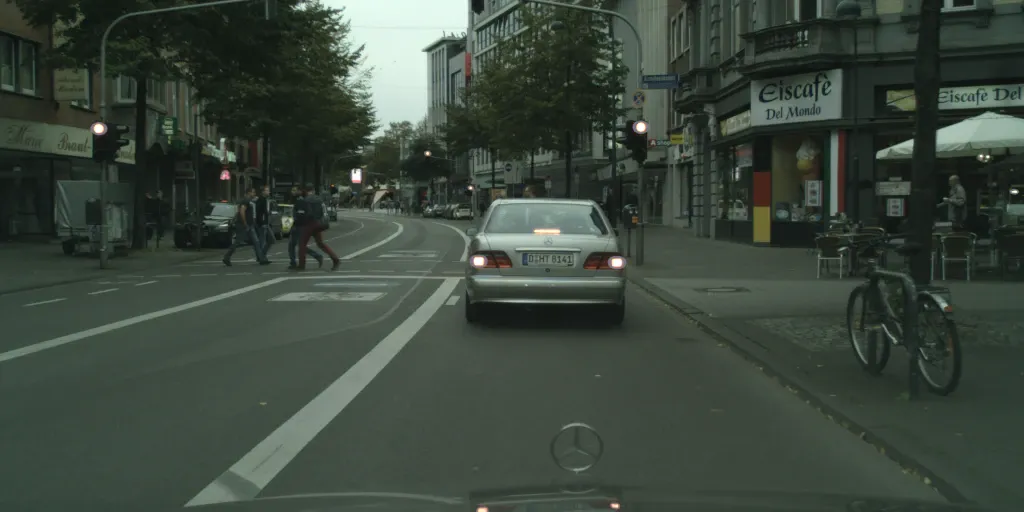
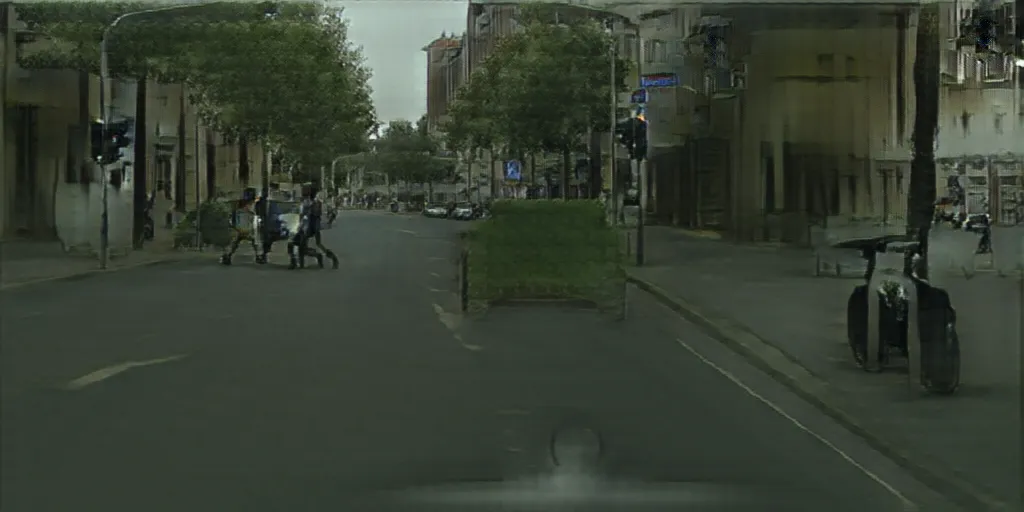
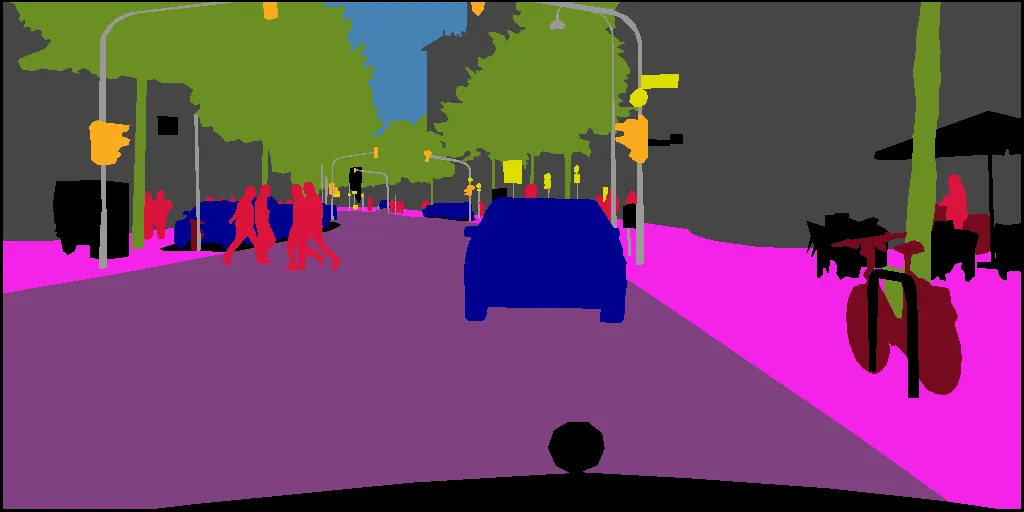
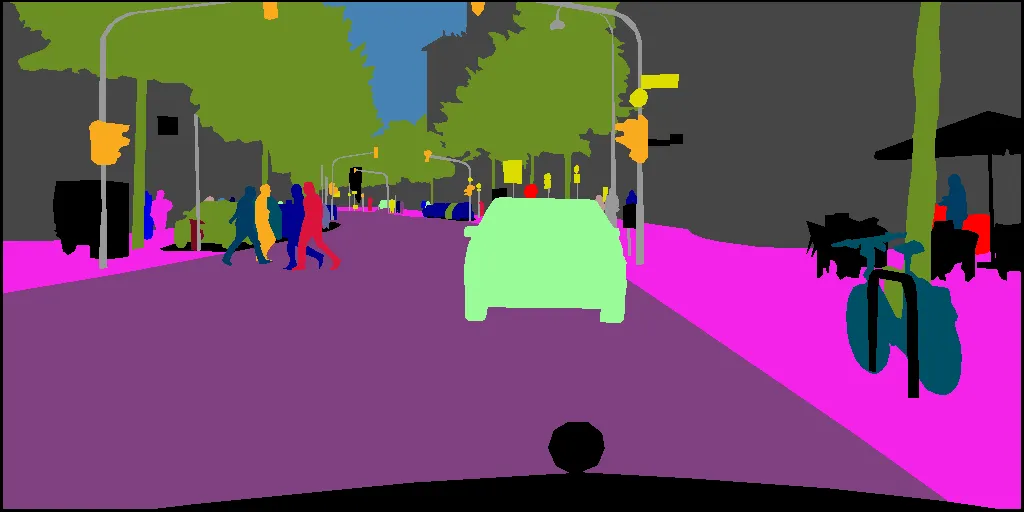
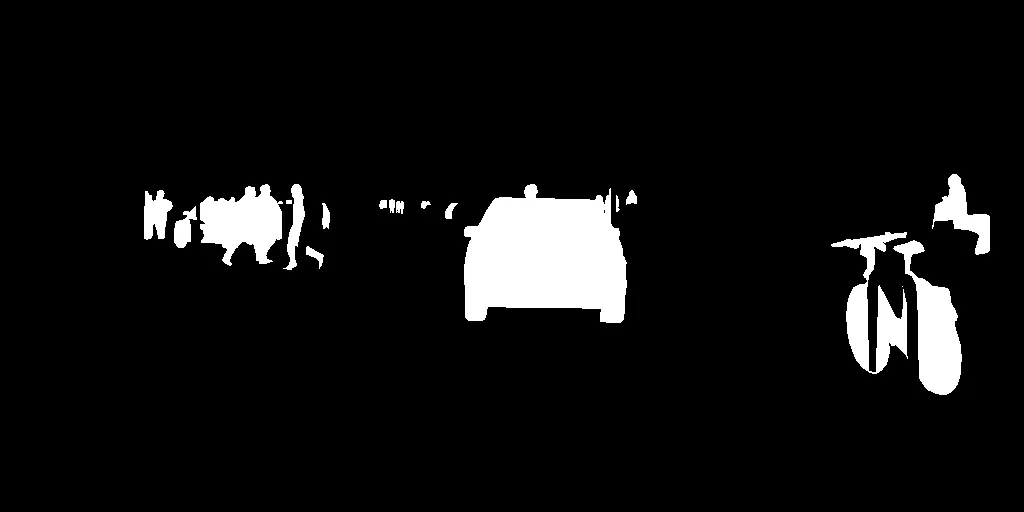

In [12]:
dset = exp.datasets['train']
# disable default loading
dset.set_channels_enabled()
# run pipeline
fr = dset[15]
fr.apply(exp.tr_synthetic_and_show)

In [13]:
# the same process but write to a file
fr.apply(exp.tr_synthetic_and_save)

## Generate whole set

In [14]:
exp.discrepancy_dataset_generate(dsets=exp.datasets.values())

Cityscapes: found images in .webp format
Discovered 2975 frames - DatasetCityscapesSmall(2975 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=train)


100%|██████████| 2975/2975 [08:08<00:00,  6.09it/s]

Cityscapes: found images in .webp format
Discovered 500 frames - DatasetCityscapesSmall(500 frames, /home/tzh005/detecting-the-unexpected/datasets/dataset_Cityscapes/1024x512, s=val)



100%|██████████| 500/500 [01:23<00:00,  6.02it/s]


## Conclusion

Complete code to generate the synthetic dataset.

In [ ]:
from src.a05_differences.experiments import Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT
from src.pipeline.config import add_experiment

class Exp0551_NewDiscrepancyVariant(Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT):
	cfg = add_experiment(Exp0521_SwapFgd_ImgAndLabelsVsGen_semGT.cfg,
		name = '0551_NewDiscrepancyVariant',
		gen_name = 'my_discrepancy_variant',
		gen_img_ext = '.webp', # better compression
		swap_fraction = 0.75, # instead of default 0.5
    )

exp = Exp0551_NewDiscrepancyVariant()
exp.init_default_datasets()
exp.discrepancy_dataset_generate(dsets=exp.datasets.values())

## Training

The Experiment class (`src/pipeline/experiment.py`) is used to train the networks:

```python
from src.a05_differences.experiments import MyExperimentVariant
MyExperimentVariant.training_procedure()
```

Weights will be written to `$DIR_EXP/0551_NewDiscrepancyVariant`
Checkpoints are saved every epoch:
* `chk_best.pth` - checkpoint with the lowest loss on eval set
* `chk_last.pth` - checkpoint after the most recent epoch
* `optimizer.pth` - optimizer data (momentum etc) after the most recent epoch
	
The directory will also contain:
* `[date]_log` - predictions for sample evaluation frames indexed by epoch
* `training.log` - logs from the logging module, if the training procedure failed, the exception will be written there

The loss is written to tensorboard, in order to display:

```bash
	tensorboard --logdir $DIR_EXP/0551_NewDiscrepancyVariant
```

In [9]:
Exp0551_NewDiscrepancyVariant.training_procedure()

-- Training procesure for Exp0551_NewDiscrepancyVariant --
Log file /home/tzh005/detecting-the-unexpected/exp/0551_NewDiscrepancyVariant/training.log initialized
Starting training job for Exp0551_NewDiscrepancyVariant
{
	"name": "0551_NewDiscrepancyVariant",
	"dir_checkpoint": "/home/tzh005/detecting-the-unexpected/exp/0551_NewDiscrepancyVariant",
	"net": {
		"type": "<none>",
		"batch_train": 2,
		"batch_eval": 3,
		"num_classes": 19
	},
	"train": {
		"optimizer": {
			"type": "adam",
			"learn_rate": 0.0001,
			"lr_patience": 5,
			"lr_min": 1e-08,
			"weight_decay": 0
		},
		"checkpoint_interval": 1,
		"class_weights": [
			1.45693524,
			19.18586532
		]
	},
	"gen_name": "my_discrepancy_variant",
	"gen_img_ext": ".webp",
	"pix2pix_variant": "0405_nostyle_crop_ctc",
	"disap_fraction": 0.5,
	"epoch_limit": 50,
	"swap_fraction": 0.75
}
Cityscapes: found images in .webp format
Discovered 2975 frames - DatasetCityscapesSmall(2975 frames, /home/tzh005/detecting-the-unexpected/datasets/dat

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading weights from checkpoint
Building optimizer
Name of the run: training_2025-12-02_09-41-21
	class weights: [1.45693524, 19.18586532]
Experiment 0551_NewDiscrepancyVariant - train
INIT
	initial val


/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:56: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return default_collate_edited([torch.as_tensor(b) for b in batch])


	init loss_e=0.06619389355182648
E 044
	train start
	train finished	t=613.063556432724s	loss_t=0.013523385066295728, val starting
	val finished	t=89.5829529762268s	loss_e=0.06433926522731781
	New best checkpoint
E 045
	train start
	train finished	t=603.5768876075745s	loss_t=0.012933387403769724, val starting
	val finished	t=89.1093680858612s	loss_e=0.06607382744550705
E 046
	train start
	train finished	t=608.3933181762695s	loss_t=0.013141983559894706, val starting
	val finished	t=93.18387818336487s	loss_e=0.06521762907505035
E 047
	train start
	train finished	t=608.8160743713379s	loss_t=0.01297227482825158, val starting
	val finished	t=93.16772508621216s	loss_e=0.06607505679130554
E 048
	train start
	train finished	t=603.16517162323s	loss_t=0.01308187059607174, val starting
	val finished	t=89.57526206970215s	loss_e=0.06671048700809479
E 049
	train start
	train finished	t=603.7131745815277s	loss_t=0.01318876733098407, val starting
	val finished	t=89.92260265350342s	loss_e=0.066152848303

KeyboardInterrupt: 